In [ ]:
import tensorflow as tf
import numpy as np
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
# from scipy import interp
from sklearn.metrics import roc_auc_score
from keras_preprocessing.image import ImageDataGenerator

import os
import shutil
import random
import glob

import cv2
import matplotlib.pyplot as plt

import tensorflow as tf
import numpy as np
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
# from scipy import interp
from sklearn.metrics import roc_auc_score

from builtins import print

import math
import cv2
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from tensorflow.keras import layers
# from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# %matplotlib inline

print('Import Done!')

from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

physical_devices = tf.config.experimental.list_physical_devices('GPU')
print("Num GPUs Available: ", len(physical_devices))
tf.config.experimental.set_memory_growth(physical_devices[0], True)

print('Import Done!')

In [2]:

train_path = 'D:\\resource\Char\pelakTrainer\\train'
valid_path = 'D:\\resource\Char\pelakTrainer\\valid'
test_path = 'D:\\resource\Char\pelakTrainer\\test'

category=['pelak', 'notpelak']

imageDataGen = ImageDataGenerator(rescale=1./255)

train_batches = imageDataGen.flow_from_directory(directory=train_path, target_size=(32,32), color_mode="grayscale", classes=category,class_mode='binary', batch_size=30)

valid_batches = imageDataGen.flow_from_directory(directory=valid_path, target_size=(32,32), color_mode="grayscale", classes=category,class_mode='binary', batch_size=30)

test_batches = imageDataGen.flow_from_directory(directory=test_path, target_size=(32,32), color_mode="grayscale",classes=category,class_mode='binary', batch_size=30, shuffle=False)

print('Done!')

Found 24661 images belonging to 2 classes.
Found 3082 images belonging to 2 classes.
Found 3084 images belonging to 2 classes.
Done!


In [3]:


model = Sequential([
    layers.Conv2D(filters=32, kernel_size=(5, 5), activation='relu', padding = 'same', input_shape=(32, 32,1)),
    layers.MaxPool2D(pool_size=(2, 2), strides=2),
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'),
    layers.MaxPool2D(pool_size=(2, 2), strides=2),
    layers.Flatten(),
    layers.Dense(units=1, activation=tf.nn.sigmoid)
])
print("Done!")

Done!


In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 4096)              0         
_________________________________________________________________
dense (Dense)                (None, 1)                 4097      
Total params: 23,425
Trainable params: 23,425
Non-trainable params: 0
____________________________________________________

In [6]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'binary_crossentropy',
              metrics=['accuracy'])

In [7]:
hist = model.fit(train_batches,
      steps_per_epoch=len(train_batches),
      validation_data = valid_batches,
      validation_steps=len(valid_batches),
      epochs=10,
      verbose=1)

print('Done!')

Epoch 1/10
823/823 [==============================] - 493s 593ms/step - loss: 0.0903 - accuracy: 0.9702 - val_loss: 0.0306 - val_accuracy: 0.9942
Epoch 2/10
823/823 [==============================] - 14s 18ms/step - loss: 0.0414 - accuracy: 0.9907 - val_loss: 0.0244 - val_accuracy: 0.9948
Epoch 3/10
823/823 [==============================] - 13s 16ms/step - loss: 0.0347 - accuracy: 0.9918 - val_loss: 0.0264 - val_accuracy: 0.9945
Epoch 4/10
823/823 [==============================] - 12s 15ms/step - loss: 0.0309 - accuracy: 0.9926 - val_loss: 0.0237 - val_accuracy: 0.9945
Epoch 5/10
823/823 [==============================] - 13s 15ms/step - loss: 0.0271 - accuracy: 0.9935 - val_loss: 0.0203 - val_accuracy: 0.9958
Epoch 6/10
823/823 [==============================] - 12s 15ms/step - loss: 0.0252 - accuracy: 0.9940 - val_loss: 0.0200 - val_accuracy: 0.9964
Epoch 7/10
823/823 [==============================] - 13s 15ms/step - loss: 0.0228 - accuracy: 0.9943 - val_loss: 0.0208 - val_accurac

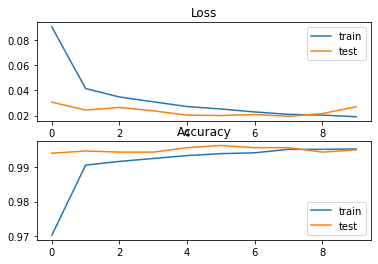

In [8]:
# from idlelib import history
from matplotlib import pyplot
# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(hist.history['loss'], label='train')
pyplot.plot(hist.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(hist.history['accuracy'], label='train')
pyplot.plot(hist.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

In [9]:
import os.path

if os.path.isfile("D:\pycharm\kerass\models") is False:
    model.save("D:\pycharm\kerass\models\pNCompleteDatasetModel.h5")
    print("Model Saved")

Model Saved


In [10]:
predictions = model.predict(x=test_batches, steps=len(test_batches), verbose=1)
print("Done!")

103/103 [==============================] - 18s 172ms/step
Done!


In [11]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [12]:
cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=-1))

Confusion matrix, without normalization
[[ 668    0]
 [2416    0]]


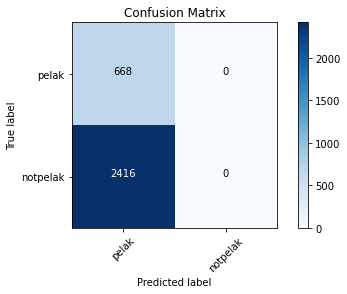

In [13]:
cm_plot_labels = ['pelak', 'notpelak']

plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [14]:
import PIL
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing import image
import time

samplePath = 'D:\\resource\Char\pelakTrainer\\test/notpelak'
zahra = random.sample(glob.glob('D:\\resource\Char\pelakTrainer\\test\*'),int(1*len(os.listdir('D:\\resource\Char\pelakTrainer\\test'))))


# print(type(zahra))
# print(zahra)
amirali = []
for image_path in os.listdir(samplePath):
    print("--------------------------------")
    # try:
        # predicting images
        # print(image_path)
    path = os.path.join(samplePath, image_path)

    img = PIL. Image. open(path)
    x = np. array(img)
    x = cv2.resize(x,(32,32))
    x = np.reshape(x,(32,32,1))
    # x = np. array(img)

    # img = image.load_img(path, target_size=(128, 128))
    # x = image.img_to_array(img)

    # plt.imshow(x)
    # plt.show()
    x = np.expand_dims(x, axis=0)
    # images = np.vstack([x])
    now = time.time()
    classes = model.predict(x/255)
    print("TIME : ",time.time()-now)
    print(classes[0])
    if classes[0]<0.5:
        amirali.append(image_path)
        print(image_path + " is a pelak")
    else:
        print(image_path + " is a notPelak")
    # except:
    #   print('false')
    #   pass
print(amirali)
# image = PIL. Image. open(testt)
# image_array = np. array(image)
# print(image_array.shape)

--------------------------------
TIME :  0.16615605354309082
[0.99995494]
13_2021-01-14_14-08-28-591_75C82466-IRN.jpg is a notPelak
--------------------------------
TIME :  0.13962769508361816
[0.9998951]
13_2021-01-14_14-08-31-979_75D84566-IRN.jpg is a notPelak
--------------------------------
TIME :  0.06582427024841309
[0.99993443]
13_2021-01-14_14-08-49-729_42B71999-IRN.jpg is a notPelak
--------------------------------
TIME :  0.07081079483032227
[0.99990857]
13_2021-01-14_14-10-18-074_14J95899-IRN.jpg is a notPelak
--------------------------------
TIME :  0.06583142280578613
[0.99987745]
13_2021-01-14_14-10-21-269_57B49222-IRN.jpg is a notPelak
--------------------------------
TIME :  0.08078265190124512
[0.9999914]
13_2021-01-14_14-10-21-713_92L58999-IRN.jpg is a notPelak
--------------------------------
TIME :  0.06582331657409668
[0.99962616]
13_2021-01-14_14-10-26-632_62X76222-IRN.jpg is a notPelak
--------------------------------
TIME :  0.045891523361206055
[0.9998153]
13_2